# Simple Linear Regression on Salary_Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [3]:
data.shape

(30, 2)

- The dataset contains 30 rows and 2 columns. 
- Each row represents single employee's YearsExperience & Salary information

In [4]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Seperate X and y

In [5]:
X = data.drop("Salary", axis = 1)
y = data['Salary']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

# Applying Linear Regression on X_train and y_train

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

# Perform Predictons on X_test and store the prediction results in y_pred

In [11]:
y_pred = lr.predict(X_test)
y_pred

array([ 74938.5855115 ,  55034.35379354, 122329.6134114 ,  59773.45658353,
        80625.50885949,  81573.32941748])

In [12]:
X_test

,YearsExperience
17,5.3
8,3.2
28,10.3
9,3.7
18,5.9
19,6.0


# Comparing the predicted values and the actual values

In [14]:
X_test

,YearsExperience
17,5.3
8,3.2
28,10.3
9,3.7
18,5.9
19,6.0


In [15]:
y_test

17     83088
8      64445
28    122391
9      57189
18     81363
19     93940
Name: Salary, dtype: int64

In [16]:
y_pred

array([ 74938.5855115 ,  55034.35379354, 122329.6134114 ,  59773.45658353,
        80625.50885949,  81573.32941748])

In [17]:
y_pred = pd.DataFrame(y_pred)
y_test = pd.DataFrame(y_test)

In [19]:
pd.concat([X_test, y_pred, y_test], axis = 1)

,YearsExperience,0,Salary
17,5.3,NaN,83088.0
8,3.2,NaN,64445.0
28,10.3,NaN,122391.0
9,3.7,NaN,57189.0
18,5.9,NaN,81363.0
19,6.0,NaN,93940.0
0,NaN,74938.585511,NaN
1,NaN,55034.353794,NaN
2,NaN,122329.613411,NaN
3,NaN,59773.456584,NaN


# Checking the value of m and c

In [23]:
# m value

m = lr.coef_
m

array([9478.20557998])

In [24]:
# c value

c = lr.intercept_
c

24704.095937601305

# Notes:

- The Linear Regression Equation is given by : y = mx + c
- For the above dataset, y = Salary, x = YearsExperience, m(after applying LR on the data) = 9478.20, c(after applying LR on the data) = 24704.09
- So the Linear Regression Equation for the above dataset will be, 
Salary = 9478.20 * YearsExperience + 24704.09

In [26]:
# What should should the salary of an employees who is 20.6 yrsexp

Sal = 9478.20 * 20.6 + 24704.08
Sal

219955.00000000006

In [28]:
sal_20 = m * 20.6 + c
sal_20

array([219955.1308852])

In [29]:
## predicting the salary of the above guy using the LR model

lr.predict([[20.6]])

array([219955.1308852])

# Checking Accuracy

In [20]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.8893181909368851

In [30]:
## Checking the error

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred, y_test))

7247.238981763743

# Conclusion:
- The average error between the actual values and the predicted values is 7,250.
- For example, an employee with 7.8 yrsexp must get a salary of 98.5k. But as we saw above that the ML model is having an error of 7,250. 
- It means that an employee of 7.8 yrsexp should get a salary in the range of 98.5K + 7250 or 98.5k - 7250(i.e. in the range of 91384.09 to 105884.09)


In [33]:
lr.predict([[7.8]])

array([98634.09946145])

In [34]:
lr.predict([[7.8]]) - 7250

array([91384.09946145])

In [35]:
lr.predict([[7.8]]) + 7250

array([105884.09946145])

# Visualize the results

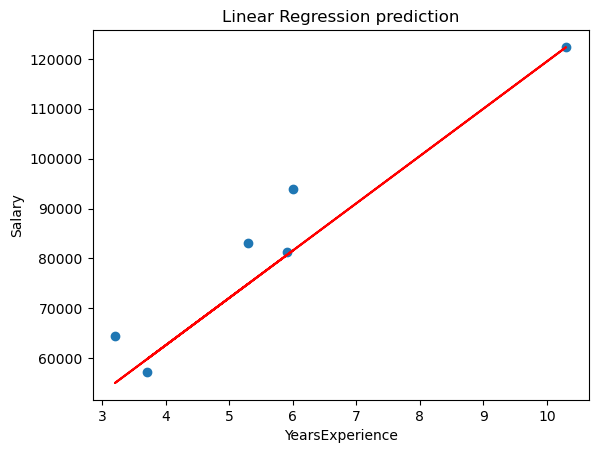

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = "red", linewidth = 1.5)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Linear Regression prediction")
plt.show()